In [3]:
import pandas as pd
import matplotlib as pyplot

In [4]:
#HDI - Education
#Here we are taking the two variables that compose the Education HDI and calculating it by parts
#One thing to note is that the those variables are the ones with the interpolation of missing data made by UN

expected = pd.read_csv("expected_years.csv")
mean = pd.read_csv("mean_years.csv")

expected = expected.dropna(axis =1, how = "all")
mean = mean.dropna(axis =1, how = "all")

expected = expected.drop("HDI Rank (2018)", axis = 1)
mean = mean.drop("HDI Rank (2018)", axis = 1)

expected = pd.melt(expected, id_vars = ["Country"])
expected = expected.rename(columns = {"value" : "expected"})

mean = pd.melt(mean, id_vars = ["Country"])
mean = mean.rename(columns = {"value" : "mean"})

education_hdi_calc = pd.merge(expected, mean, on = ["Country", "variable"])

education_hdi_calc["expected"] = pd.to_numeric(education_hdi_calc["expected"], errors = "coerce")/18
education_hdi_calc["mean"] =  pd.to_numeric(education_hdi_calc["mean"], errors = "coerce")/15
education_hdi_calc["expected"] = education_hdi_calc["expected"].clip(0,1)
education_hdi_calc["mean"] = education_hdi_calc["mean"].clip(0,1)

education_hdi_calc["education_hdi"] = education_hdi_calc[['expected', 'mean']].mean(axis=1)
education_hdi_calc = education_hdi_calc.dropna()

education_hdi_calc["country"] = education_hdi_calc["Country"]
education_hdi_calc["year"] = education_hdi_calc["variable"]
education_hdi_calc.year = education_hdi_calc.year.astype(int)

education_hdi_calc.set_index(["country", "year"], inplace = True)
#education_hdi_calc = pd.DataFrame(education_hdi_calc["education_hdi"])
#education_hdi_calc.reset_index(inplace = True)

In [5]:
#Now we take the already calculated Education HDI

education_hdi = pd.read_csv("education_hdi.csv", sep =";")
education_hdi = education_hdi.dropna(axis =1, how = "all")
education_hdi = education_hdi.drop("HDI Rank (2018)", axis = 1)
education_hdi = pd.melt(education_hdi, id_vars = ["Country"])
education_hdi = education_hdi.rename(columns = {"value" : "true_hdi"})
education_hdi = pd.merge(education_hdi, education_hdi_calc, on = ["Country", "variable"])
education_hdi["true_hdi"] = education_hdi["true_hdi"].astype("float")

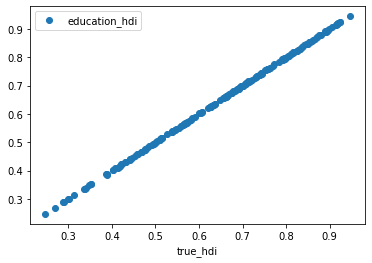

In [6]:
#here is a simple scatter plot between the two, indicating the correspondence
education_hdi[education_hdi["variable"] == "2018"].plot(x='true_hdi', y='education_hdi', style='o')


# Creating the Index

In [7]:
### importing packages

import pandas as pd
import matplotlib as pyplot


In [8]:
###database
coucodes = pd.read_csv("CountryCodes.csv", sep = ";")
countries = coucodes["ISO Code"].tolist()

In [9]:
## importing education database

education = pd.read_csv('Education_codes.csv', header = 0)
education = education["index"].tolist()
education

['HD.HCI.EYRS',
 'HD.HCI.EYRS.FE',
 'HD.HCI.EYRS.MA',
 'SE.XPD.TOTL.GD.ZS',
 'SE.PRE.ENRR',
 'UIS.GER.12',
 'SE.SEC.ENRR',
 'SE.TER.ENRR',
 'SE.ADT.LITR.ZS',
 'UIS.EA.MEAN.1T6.AG25T99',
 'SE.SCH.LIFE.FE',
 'SE.SCH.LIFE.MA',
 'IT.NET.EDUC.ZS',
 'SE.SEC.CUAT.UP.ZS',
 'SE.SEC.CUAT.UP.FE.ZS',
 'SE.SEC.CUAT.UP.MA.ZS',
 'SE.PRM.DROP.ZS',
 'SE.PRM.TCAQ.ZS',
 'LO.PISA.MAT',
 'LO.PISA.REA',
 'LO.PISA.SCI',
 'SE.PRM.ENRL.TC.ZS',
 'UIS.SR.2.GPV.GLAST.CP.T',
 'SE.SCH.LIFE',
 'BAR.SCHL.25UP']

In [10]:
#downloading data from worldbank

import pandas_datareader
from pandas_datareader import wb

worldbank_data = pandas_datareader.wb.download(indicator = education, country = countries, start = 2010, end = 2020, freq = "A")
worldbank_data2 = pandas_datareader.wb.download(indicator = education, country = countries, start = 2000, end = 2009, freq = "A")
worldbank_data3 = pandas_datareader.wb.download(indicator = education, country = countries, start = 1990, end = 1999, freq = "A")

worldbank_data = pd.concat([worldbank_data, worldbank_data2])
worldbank_data = pd.concat([worldbank_data, worldbank_data3])



C:\Users\Bebezi\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Users\Bebezi\Anaconda3\lib\site-packages\pandas_datareader\wb.py:659: UserWarning: No results found from world bank. Indicator: HD.HCI.EYRS
  warnings.warn(msg)
C:\Users\Bebezi\Anaconda3\lib\site-packages\pandas_datareader\wb.py:659: UserWarning: No results found from world bank. Indicator: HD.HCI.EYRS.FE
  warnings.warn(msg)
C:\Users\Bebezi\Anaconda3\lib\site-packages\pandas_datareader\wb.py:659: UserWarning: No results found from world bank. Indicator: HD.HCI.EYRS.MA
  warnings.warn(msg)
C:\Users\Bebezi\Anaconda3\lib\site-packages\pandas_datareader\wb.py:659: UserWarning: Problem with a World Bank Query 
 Invalid format 
  The indicator was not found. It may have been deleted or archived.. Indicator: IT.NET.EDUC.ZS
  warnings.warn(msg)

In [82]:
worldbank_data_idx = worldbank_data.reset_index()

#from pupil to teacher to teacher to pupil
worldbank_data_idx["SE.PRM.ENRL.TC.ZS"] = 1/worldbank_data_idx["SE.PRM.ENRL.TC.ZS"]

#And school dropout

worldbank_data_idx["SE.PRM.DROP.ZS"] = 1/worldbank_data_idx["SE.PRM.DROP.ZS"]

#Mean PISA scores due to high correlation

worldbank_data_idx["LO.PISA"] = (worldbank_data_idx["LO.PISA.MAT"]+worldbank_data_idx["LO.PISA.REA"]+worldbank_data_idx["LO.PISA.SCI"])/3


#and create a gender education variable

worldbank_data_idx["gender_ratio1"] = worldbank_data_idx["SE.SCH.LIFE.FE"]/worldbank_data_idx["SE.SCH.LIFE.MA"] 
worldbank_data_idx["gender_ratio2"] = worldbank_data_idx["SE.SEC.CUAT.UP.FE.ZS"]/worldbank_data_idx["SE.SEC.CUAT.UP.MA.ZS"]
#worldbank_data_idx["gender_ratio"] =worldbank_data_idx[["gender_ratio1","gender_ratio2"]].mean(axis = 1)


worldbank_data_idx = worldbank_data_idx.drop(["SE.SCH.LIFE.FE", "LO.PISA.MAT", "LO.PISA.REA", "LO.PISA.SCI", "SE.SCH.LIFE.MA", "SE.SEC.CUAT.UP.MA.ZS", "SE.SEC.CUAT.UP.FE.ZS", "gender_ratio1", "gender_ratio2"], axis=1)

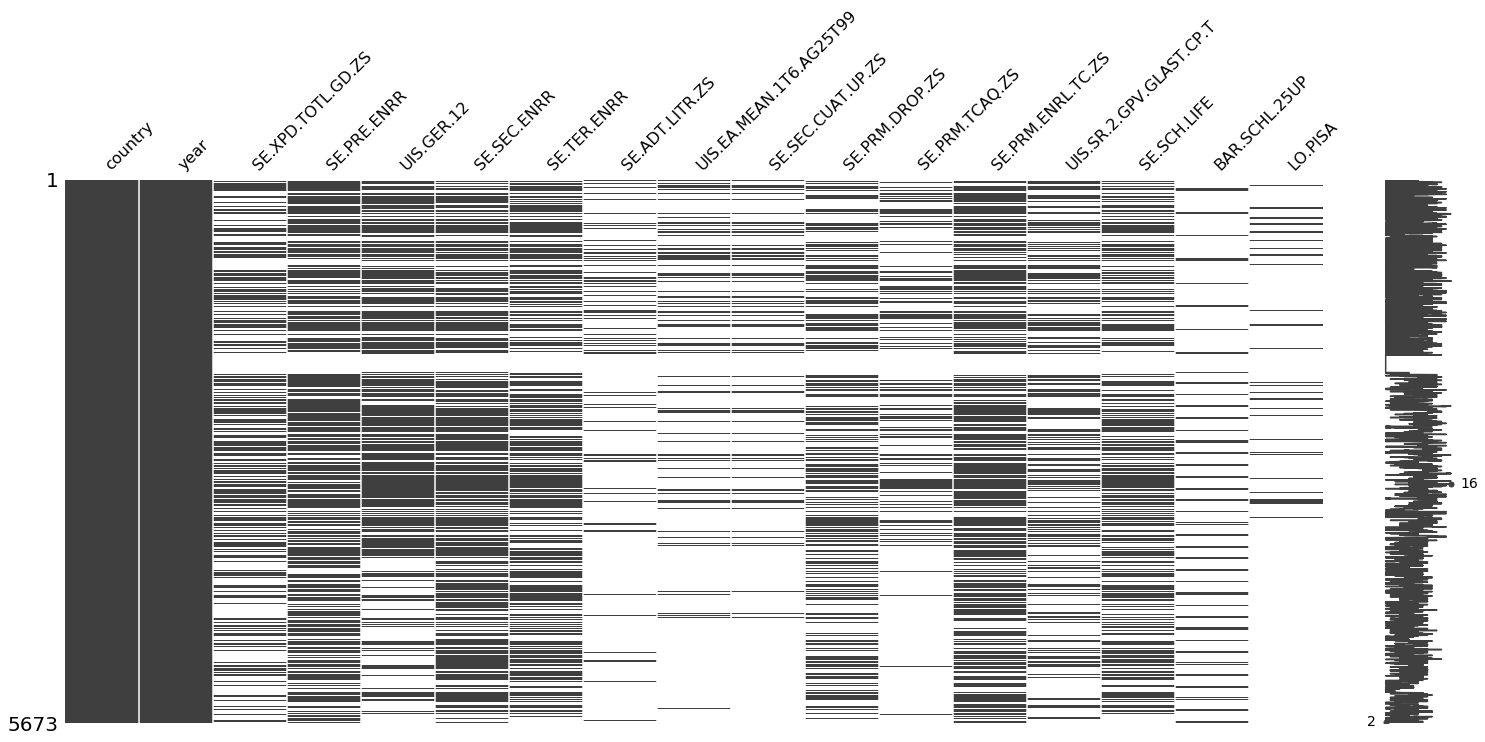

In [83]:
import missingno as msno
msno.matrix(worldbank_data_idx)

In [84]:
#import pandas_profiling
#pandas_profiling.ProfileReport(worldbank_data_idx)

In [86]:
#Treating the missing data
import numpy as np
from fancyimpute import KNN, SoftImpute, IterativeImputer, BiScaler, NuclearNormMinimization, IterativeSVD  
worldbank_data_ind = worldbank_data_idx.set_index('country')
worldbank_data_ind["country"] = worldbank_data_ind.index
worldbank_data_hotenco = pd.get_dummies(worldbank_data_ind, columns=["country"])
worldbank_data_hotenco.replace([np.inf, -np.inf], np.nan, inplace = True)
worldbank_data_filled = pd.DataFrame(IterativeImputer().fit_transform(worldbank_data_hotenco))
worldbank_data_filled.columns = worldbank_data_hotenco.columns
worldbank_data_filled["country"] = worldbank_data_idx["country"]
worldbank_data_filled.set_index("country", inplace = True)
worldbank_data_filled = worldbank_data_filled[worldbank_data_filled.columns.drop(list(worldbank_data_filled.filter(regex='country')))]


C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [87]:
#scaling
import pandas as pd
from sklearn import preprocessing

x = worldbank_data_filled.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler() #min-max

nonlinear_scaler = preprocessing.QuantileTransformer(random_state=0) #non linear

x_scaled = nonlinear_scaler.fit_transform(x) # change between min_max or non linear

#worldbank_data_scaled = worldbank_data_filled*1./np.max(worldbank_data_filled, axis=0) #divide my column max

worldbank_data_scaled = pd.DataFrame(x_scaled, columns = worldbank_data_filled.columns) #max-min or non linear

worldbank_data_scaled["year"] = worldbank_data_filled["year"].values.astype(int)
worldbank_data_scaled["country"] = worldbank_data_filled.index
worldbank_data_scaled.set_index(["country",'year'], inplace = True)

#Taking the mean to build our indicator
worldbank_data_scaled["indicator"] = worldbank_data_scaled.mean(axis=1)

#Or Median
#worldbank_data_scaled["indicator"] = worldbank_data_scaled.median(axis=1)

#Or it can be done by using PCA first component weight (no big differences)

#from sklearn.decomposition import PCA
#pca = PCA(n_components=1)
#worldbank_data_scaled["indicator"] = pca.fit_transform(worldbank_data_scaled)




worldbank_data_scaled.reset_index(inplace = True)
worldbank_data_scaled.year = worldbank_data_scaled.year.astype(int)
merged_data = pd.merge(worldbank_data_scaled, education_hdi_calc, on = ["country", "year"], how = "left")


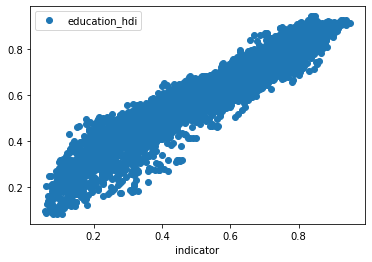

In [88]:
merged_data.plot(x='indicator', y='education_hdi', style='o')


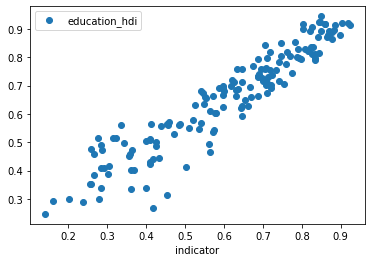

In [89]:
merged_data[merged_data["year"] == 2018].plot(x='indicator', y='education_hdi', style='o')


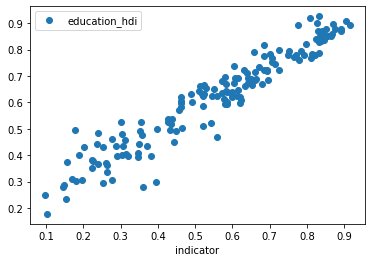

In [90]:
merged_data[merged_data["year"] == 2010].plot(x='indicator', y='education_hdi', style='o')


In [91]:
merged_data[merged_data["year"] == 2018].nlargest(10, 'indicator')

,country,year,SE.XPD.TOTL.GD.ZS,SE.PRE.ENRR,UIS.GER.12,SE.SEC.ENRR,SE.TER.ENRR,SE.ADT.LITR.ZS,UIS.EA.MEAN.1T6.AG25T99,SE.SEC.CUAT.UP.ZS,...,UIS.SR.2.GPV.GLAST.CP.T,SE.SCH.LIFE,BAR.SCHL.25UP,LO.PISA,indicator,Country,variable,expected,mean,education_hdi
1531,Sweden,2018,0.837652,0.877734,0.817934,0.970157,0.888789,0.896820,0.953346,0.931549,...,0.965357,0.967971,0.969061,0.908123,0.922765,Sweden,2018,1.000000,0.826667,0.913333
451,Denmark,2018,0.917749,0.933872,0.772161,0.965681,0.920514,0.663579,0.978516,0.958074,...,0.917082,0.963473,0.940992,0.902135,0.918310,Denmark,2018,1.000000,0.840000,0.920000
1231,Norway,2018,0.884873,0.884404,0.568746,0.962008,0.918604,0.969983,0.955088,0.911914,...,0.796575,0.974904,0.964350,0.886388,0.903098,Norway,2018,1.000000,0.840000,0.920000
521,Estonia,2018,0.647703,0.941545,0.644766,0.925678,0.893546,0.967770,0.998417,0.991814,...,0.967020,0.906909,0.981915,0.964568,0.898211,Estonia,2018,0.894444,0.866667,0.880556
541,Finland,2018,0.895833,0.532825,0.836821,0.961767,0.952836,0.739765,0.959820,0.865860,...,0.907916,0.981750,0.887872,0.949638,0.884737,Finland,2018,1.000000,0.826667,0.913333
281,Switzerland,2018,0.701666,0.872140,0.855207,0.708713,0.800499,0.937676,0.994764,0.985689,...,0.717083,0.897970,0.975331,0.889864,0.883104,Switzerland,2018,0.900000,0.893333,0.896667
1321,Poland,2018,0.509524,0.773051,0.662640,0.956049,0.883936,0.982946,0.937544,0.932444,...,0.960510,0.919735,0.936315,0.939730,0.878521,Poland,2018,0.911111,0.820000,0.865556
271,Canada,2018,0.815002,0.636691,0.812831,0.910830,0.944879,0.883957,0.985613,0.935132,...,0.997758,0.960553,0.974169,0.950249,0.876271,Canada,2018,0.894444,0.886667,0.890556
1521,Slovenia,2018,0.628544,0.866049,0.601884,0.937312,0.912362,0.980169,0.912577,0.906907,...,0.786616,0.941059,0.976070,0.912403,0.870332,Slovenia,2018,0.966667,0.820000,0.893333
791,Israel,2018,0.719092,0.977094,0.707896,0.937940,0.869899,0.974363,0.948290,0.911668,...,0.675921,0.921910,0.982419,0.789778,0.866863,Israel,2018,0.888889,0.866667,0.877778


In [92]:
merged_data[merged_data["year"] == 2019].nlargest(10, 'education_hdi')

,country,year,SE.XPD.TOTL.GD.ZS,SE.PRE.ENRR,UIS.GER.12,SE.SEC.ENRR,SE.TER.ENRR,SE.ADT.LITR.ZS,UIS.EA.MEAN.1T6.AG25T99,SE.SEC.CUAT.UP.ZS,...,UIS.SR.2.GPV.GLAST.CP.T,SE.SCH.LIFE,BAR.SCHL.25UP,LO.PISA,indicator,Country,variable,expected,mean,education_hdi


In [93]:
merged_data.corr()


,year,SE.XPD.TOTL.GD.ZS,SE.PRE.ENRR,UIS.GER.12,SE.SEC.ENRR,SE.TER.ENRR,SE.ADT.LITR.ZS,UIS.EA.MEAN.1T6.AG25T99,SE.SEC.CUAT.UP.ZS,SE.PRM.DROP.ZS,SE.PRM.TCAQ.ZS,SE.PRM.ENRL.TC.ZS,UIS.SR.2.GPV.GLAST.CP.T,SE.SCH.LIFE,BAR.SCHL.25UP,LO.PISA,indicator,expected,mean,education_hdi
year,1.000000,0.095216,0.252314,0.308126,0.251660,0.391412,0.236953,0.337407,0.357912,0.221493,0.169094,0.215000,0.136582,0.389636,0.308577,0.020272,0.326834,0.288921,0.232531,0.269426
SE.XPD.TOTL.GD.ZS,0.095216,1.000000,0.335322,0.314942,0.360352,0.248066,0.317990,0.278386,0.200693,0.133389,0.241926,0.376180,0.184468,0.376316,0.354787,0.214393,0.437108,0.414016,0.370048,0.406689
SE.PRE.ENRR,0.252314,0.335322,1.000000,0.470666,0.654724,0.581912,0.581898,0.590982,0.541298,0.328851,0.406688,0.653472,0.433425,0.705830,0.685652,0.730935,0.770386,0.690081,0.676987,0.711542
UIS.GER.12,0.308126,0.314942,0.470666,1.000000,0.665036,0.448690,0.565246,0.398465,0.357304,0.170101,0.243105,0.508418,0.256469,0.759786,0.479912,0.246819,0.609548,0.699289,0.496040,0.614753
SE.SEC.ENRR,0.251660,0.360352,0.654724,0.665036,1.000000,0.687246,0.774939,0.691626,0.732094,0.429141,0.487900,0.794851,0.599385,0.902970,0.823546,0.660725,0.908754,0.885755,0.858991,0.907731
SE.TER.ENRR,0.391412,0.248066,0.581912,0.448690,0.687246,1.000000,0.627161,0.619420,0.673350,0.341465,0.465993,0.643898,0.498965,0.776298,0.661349,0.581436,0.783984,0.747849,0.707367,0.756398
SE.ADT.LITR.ZS,0.236953,0.317990,0.581898,0.565246,0.774939,0.627161,1.000000,0.633863,0.680802,0.420748,0.420188,0.713095,0.487445,0.753260,0.796851,0.530913,0.823750,0.777474,0.854213,0.852837
UIS.EA.MEAN.1T6.AG25T99,0.337407,0.278386,0.590982,0.398465,0.691626,0.619420,0.633863,1.000000,0.831498,0.423953,0.435941,0.660495,0.563941,0.709165,0.816451,0.651325,0.823849,0.683735,0.822598,0.789943
SE.SEC.CUAT.UP.ZS,0.357912,0.200693,0.541298,0.357304,0.732094,0.673350,0.680802,0.831498,1.000000,0.496683,0.540664,0.633678,0.636880,0.692093,0.858355,0.600707,0.838951,0.673781,0.861861,0.807107
SE.PRM.DROP.ZS,0.221493,0.133389,0.328851,0.170101,0.429141,0.341465,0.420748,0.423953,0.496683,1.000000,0.338986,0.438854,0.369097,0.405817,0.501657,0.381512,0.547158,0.384575,0.482996,0.455678


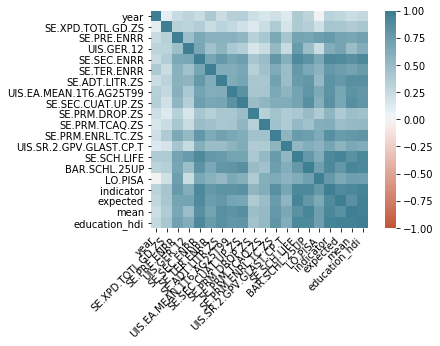

In [94]:
import seaborn as sns
corr = merged_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [95]:
#Indicators
#Government expenditure on education (% of GDP),
#Gross enrolment ratio, pre-primary (% of preschool-age children),
#Gross enrolment ratio, primary (% of primary school-age population),
#Gross enrolment ratio, secondary (% of secondary school-age population),
#Gross enrolment ratio, tertiary (% of tertiary school-age population),
#Literacy rate, adult (% ages 15 and older),
#Mean years of schooling (years),(this and the expected years of schooling compose the education hdi)
#Mean years of schooling, female (years),
#Mean years of schooling, male (years), (this could be used to create a third variable, indicating the difference between genders)
#Percentage of primary schools with access to the internet ,
#Percentage of secondary schools with access to the internet ,
#Population with at least some secondary education (% ages 25 and older),
#Population with at least some secondary education, female (% ages 25 and older),
#Population with at least some secondary education, male (% ages 25 and older),
#Primary school dropout rate (% of primary school cohort),
#Primary school teachers trained to teach (%),
#Programme for International Student Assessment (PISA) score in mathematics,
#Programme for International Student Assessment (PISA) score in reading,
#Programme for International Student Assessment (PISA) score in science,
#Pupil-teacher ratio, primary school (number of pupils per teacher),
#Survival rate to the last grade of lower secondary general education (%),


In [96]:
#individual graph
import plotly.express as px

merged_data['indicator_minmax'] = merged_data.groupby('year')['indicator'].apply(lambda x: (x-min(x))/(max(x)-min(x)))


merged_data = merged_data[merged_data["year"] < 2020]

fig = px.line(merged_data[merged_data["country"] == "Australia"], x='year', y='indicator_minmax')
fig.show()

In [97]:
#aggregated index

aggregated_data = merged_data.groupby('year').mean()
aggregated_data = aggregated_data.reset_index()

fig = px.line(aggregated_data, y='indicator', x = "year")
fig.show()

In [ ]:
merged_data.set_index("year")

lista = merged_data["country"].unique()

import plotly.express as px
import plotly.graph_objects as go

for iso in lista:

    merged_data_c = merged_data[merged_data["country"] == iso]
    
    merged_data_c.reset_index(inplace = True)

    fig = go.Figure()


    fig.add_trace(go.Scatter(
                    x=merged_data_c["year"],
                    y=merged_data_c['indicator'],
                    name="Indicator",
                    line_color='green',
                    opacity=1,
                    line=dict(color='deepskyblue', width=4
                                  )))
    fig.add_trace(go.Scatter(
                    x=merged_data_c["year"],
                    y=merged_data_c['education_hdi'],
                    name="Education_hdi",
                    line_color='rgb(264, 45, 45)',
                    opacity=1,
                    line=dict(color='deepskyblue', width=4
                                  )))

    fig.update_layout(
        autosize=False,
        width=1000,
        height=600,
        yaxis=dict(
        range=[0, 1]),
        xaxis = dict(
        range = ['1990','2019'],
        tickmode='linear',
        tickangle=45)
    )
    

    fig.write_image(iso + "education_indi.png")

In [98]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from fbprophet import Prophet


In [99]:
#forecasting
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

lista = merged_data["country"].unique()

for iso in lista:
    merged_data_c = merged_data[merged_data["country"] == iso]

    df = merged_data_c[['indicator', "year"]]
    df.set_index("year", inplace = True)
    df = df.iloc[::-1]

    model = pm.auto_arima(df)

    d = {'year': [2020, 2021, 2022, 2023, 2024], 'forecast': model.predict(5)}
    forecasts = pd.DataFrame(data =d)
    merged_data_c["forecast"] = ""
    predicted = pd.concat([merged_data_c, forecasts], keys=['year', 'forecast'])


    predicted.sort_values(by=['year'], inplace = True)

    predicted['indicator'] = np.where(predicted['year']==2020, predicted[predicted["year"] == 2020]["forecast"], predicted['indicator'])

    fig = go.Figure()


    fig.add_trace(go.Scatter(
                        x=predicted["year"],
                        y=predicted['indicator'],
                        name="Indicator",
                        line_color='green',
                        opacity=1,
                        line=dict(color='deepskyblue', width=4
                                      )))
    fig.add_trace(go.Scatter(
                        x=predicted["year"],
                        y=predicted['forecast'],
                        name="Forecast",
                        line_color='rgb(264, 45, 45)',
                        opacity=1,
                        line=dict(color='deepskyblue', width=4
                                      )))
    fig.add_trace(go.Scatter(
                    x=merged_data_c["year"],
                    y=merged_data_c['education_hdi'],
                    name="Education_hdi",
                    line_color='blue',
                    opacity=1,
                    line=dict(color='deepskyblue', width=4
                                  )))

    fig.update_layout(
            autosize=False,
            width=1000,
            height=600,
            yaxis=dict(
            range=[0, 1]),
            xaxis = dict(
            tickangle=45)
        )

    fig.write_image(iso + "_" + "education_indicator_forecast.png")

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Py

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check 

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23:

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Py

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Py

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Py

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Py

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\Anaconda3\lib\site-packag

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\b

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\Anaconda3\lib\site-packag

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\stats

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmo

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\b

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Py

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\Anaconda3\lib\site-packag

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Py

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmo

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\Bebezi\AppData\Roaming\Python\Py

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Bebezi\AppData\Roaming\Python\Python37\site-packages\statsmodels\b

In [30]:
 merged_data_c.shape

(30, 25)